# Task 1

---



## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [2]:
# Define base url, pages and page_size
base_url = "https://www.airlinequality.com/airline-reviews/pegasus-airlines"
pages = 2
page_size = 100

The follwing variables describe the type of data that will be collected for each review

In [3]:
# Initialise empty lists to store scraped data
authors = []
countries = []
dates = []
ratings = []
reviews = []
aircrafts = []
traveller_types = []
seat_types = []
routes = []
dates_flown = []
seats_comfort = []
cabin_staff_services = []
foods_and_beveragess = []
inflights_entertainment = []
ground_services = []
wifis =[]
value_for_moneys = []
recommendations = []
articles = []

In [4]:
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for article in parsed_content.find_all("article",{"itemprop":"review"}):
        articles.append(article)

        # Scrap autors content
        authors.append(article.find("h3",{"class":"text_sub_header userStatusWrapper"}).find("span", {"itemprop": "name"}).get_text())

        # Scrap countries content
        countries.append(re.findall(r'\((.*?)\)', article.find("h3",{"class":"text_sub_header userStatusWrapper"}).get_text())[0])

        # Scrap dates
        dates.append(article.find("time",{"itemprop":"datePublished"}).attrs['datetime'])

        # Scrap ratings
        ratings.append(article.find("span",{"itemprop":"ratingValue"}).get_text())

        # Scrap reviews
        reviews.append(article.find("div", {"class": "text_content"}).get_text())

        # Scrap the reviews ratings table (Aircrafts, traveller types, seat types, routes, dates flown, seats comfort, cabin staff service, food & beverages, inflight services, ground services, wifis, value for moneys and recommendations)
        t = article.find("table", {"class": "review-ratings"}).find_all("td")

        aircraft = None
        type_of_traveller = None
        seat_type = None
        route = None
        date_flown = None
        seat_comfort = None
        cabin_staff_service = None
        food_and_beverages = None
        inflight_entertainment = None
        ground_service = None
        wifi = None
        value_for_money = None
        recommended = None

        for i in range(0, len(t), 2):
            header = t[i].text.strip()
            value = t[i + 1].text.strip()
            
            if header == "Aircraft":
                aircraft = value
            elif header == "Type Of Traveller":
                type_of_traveller = value
            elif header == "Seat Type":
                seat_type = value
            elif header == "Route":
                route = value
            elif header == "Date Flown":
                date_flown = value
            elif header == "Seat Comfort":
                # Extract the number of stars with class "star fill"
                stars = t[i + 1].find_all('span', {'class':'star fill'})
                seat_comfort = len(stars)
            elif header == "Cabin Staff Service":
                # Extract the number of stars with class "star fill"
                stars = t[i + 1].find_all('span', {'class':'star fill'})
                cabin_staff_service = len(stars)
            elif header == "Food & Beverages":
                # Extract the number of stars with class "star fill"
                stars = t[i + 1].find_all('span', {'class':'star fill'})
                food_and_beverages = len(stars)
            elif header == "Inflight Entertainment":
                # Extract the number of stars with class "star fill"
                stars = t[i + 1].find_all('span', {'class':'star fill'})
                inflight_entertainment = len(stars)
            elif header == "Ground Service":
                # Extract the number of stars with class "star fill"
                stars = t[i + 1].find_all('span', {'class':'star fill'})
                ground_service = len(stars)
            elif header == "Wifi & Connectivity":
                # Extract the number of stars with class "star fill"
                stars = t[i + 1].find_all('span', {'class':'star fill'})
                wifi = len(stars)
            elif header == "Value For Money":
                # Extract the number of stars with class "star fill"
                stars = t[i + 1].find_all('span', {'class':'star fill'})
                value_for_money = len(stars)
            elif header == "Recommended":
                recommended = value

      
        # Append scraped data to respective lists with None (null) where data is missing
        aircrafts.append(aircraft)
        traveller_types.append(type_of_traveller)
        seat_types.append(seat_type)
        routes.append(route)
        dates_flown.append(date_flown)
        seats_comfort.append(seat_comfort)
        cabin_staff_services.append(cabin_staff_service)
        foods_and_beveragess.append(food_and_beverages)
        inflights_entertainment.append(inflight_entertainment)
        ground_services.append(ground_service)
        wifis.append(wifi)
        value_for_moneys.append(value_for_money)
        recommendations.append(recommended)
        

Scraping page 1
Scraping page 2


In [5]:
# Create the dataframe
df = pd.DataFrame()
df["authors"] = authors
df["countries"] = countries
df["date"] = dates
df["rating"] = ratings
df["reviews"] = reviews
df["aircraft"] = aircrafts
df["traveller type"] = traveller_types
df["seat type"] = seat_types
df["route"] = routes
df["date flown"] = dates_flown
df["seat comfort"] = seats_comfort
df["cabin staff service"] = cabin_staff_services
df["food & beverages"] = foods_and_beveragess
df["inflight entertainment"] = inflights_entertainment
df["ground service"] = ground_services
df["wifi"] = wifis
df["value for money"] = value_for_moneys
df["recommended"] = recommendations

## Data Cleaning

In [6]:
# Create a new column that includes information about the verification of the trip for each review
df['verified'] = df['reviews'].str.contains('Trip Verified')

# Strip the Trip Verified and the Not Verified
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified', '')
df['reviews'] = df['reviews'].str.replace('Not Verified', '')
df['reviews'] = df['reviews'].str.replace('|', '')

# Strip the initial spaces in the reviews column
df['reviews'] = df['reviews'].str.lstrip()

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert the 'rating' column from string to int
df['rating'] = df['rating'].astype(int)

# Separate the route to include start, end and transfer airports:
# Initialize empty lists
start_airports = []
end_airports = []
transfer_airports = []

# Loop through each row in the DataFrame
for route in df.route:
    if route == None:
        start, end, transfer = None, None, None
    elif ' to ' not in route and ' via ' not in route:
        start, end, transfer = None, None, None 
    elif ' via ' not in route:
        start, end, transfer = route.split(' to ')[0], route.split(' to ')[1], None
    elif ' to ' not in route:
        start, end, transfer = None, route.split(' via ')[0], route.split(' via ')[1]
    else:
        start, end, transfer = route.split(' to ')[0], (route.split(' to ')[1]).split(' via ')[0], route.split(' via ')[1]

    start_airports.append(start)
    end_airports.append(end)
    transfer_airports.append(transfer)

# Add the new columns to the DataFrame
df['start airport'] = start_airports
df['end airport'] = end_airports
df['transfer airport'] = transfer_airports

/var/folders/9j/r5th0fxd26341bbn6qkwvlww0000gn/T/ipykernel_46169/3162418863.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews'] = df['reviews'].str.replace('|', '')


## Export CSV

In [7]:
# Export the cleaned dataset
cwd = os.getcwd()
df.to_csv(f"{cwd}/data/pegasus_airlines_reviews.csv")

## Import DataFrame from CSV

In [8]:
# Import the data from the file
cwd = os.getcwd()
df = pd.read_csv(f"{cwd}/data/pegasus_airlines_reviews.csv", index_col=0)
df.head()

,authors,countries,date,rating,reviews,aircraft,traveller type,seat type,route,date flown,...,food & beverages,inflight entertainment,ground service,wifi,value for money,recommended,verified,start airport,end airport,transfer airport
0,Nikolai Sondergaard,Denmark,2023-11-10,1,Worst experience ever. I have never written re...,NaN,Solo Leisure,Economy Class,Istanbul to Bruxelles,August 2023,...,1.0,1.0,2.0,1.0,2,no,True,Istanbul,Bruxelles,NaN
1,Kenan Arslan,United Arab Emirates,2023-11-10,1,"They have delayed 1 hour, then another 30 minu...",NaN,Solo Leisure,Economy Class,Adana to Sabiha Gokcen,November 2023,...,1.0,1.0,1.0,1.0,1,no,True,Adana,Sabiha Gokcen,NaN
2,S Senturk,United Kingdom,2023-11-10,1,The pram of my son arrived damaged after my fl...,NaN,Family Leisure,Economy Class,Ankara to Manchester via Istanbul,October 2023,...,1.0,1.0,1.0,1.0,1,no,True,Ankara,Manchester,Istanbul
3,Luc Wens,Belgium,2023-10-28,1,"A delay in the return flight (2,5 hours) was a...",Boeing 737-800,Business,Economy Class,Istanbul to Brussels Charleroi,October 2023,...,NaN,NaN,1.0,NaN,1,no,True,Istanbul,Brussels Charleroi,NaN
4,Manar Ali Hassan,Lebanon,2023-10-23,1,Our flight was delayed 3 times. We got stuck i...,NaN,Couple Leisure,Economy Class,Istanbul to Beirut,October 2023,...,NaN,NaN,1.0,NaN,1,no,False,Istanbul,Beirut,NaN


In [9]:
# Drop all the rows where the trip is not verified
# df = df[df['verified'] == True]

In [10]:
# Obtain df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   authors                 200 non-null    object 
 1   countries               200 non-null    object 
 2   date                    200 non-null    object 
 3   rating                  200 non-null    int64  
 4   reviews                 200 non-null    object 
 5   aircraft                47 non-null     object 
 6   traveller type          200 non-null    object 
 7   seat type               200 non-null    object 
 8   route                   200 non-null    object 
 9   date flown              200 non-null    object 
 10  seat comfort            181 non-null    float64
 11  cabin staff service     180 non-null    float64
 12  food & beverages        105 non-null    float64
 13  inflight entertainment  72 non-null     float64
 14  ground service          193 non-null    fl

## EDA

##### Ratings Average

In [11]:
# Print the average of ratings

average_rating = df.rating.mean()
print(f"The Average of Ratings is {average_rating:.2f}")

The Average of Ratings is 2.70


#### Recommended Ratings

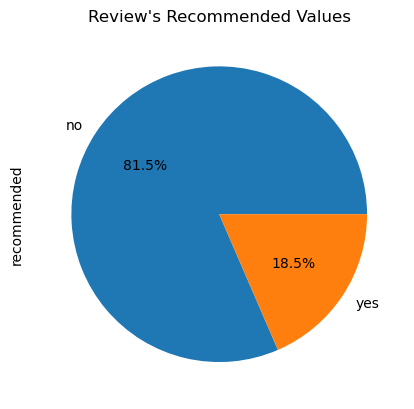

In [12]:
# Plot the recommended value counts as a pie chart
df.recommended.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Review's Recommended Values")
plt.show()

#### Routes

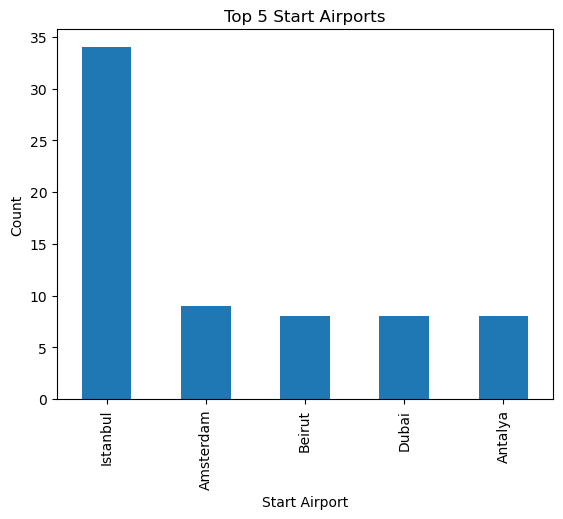

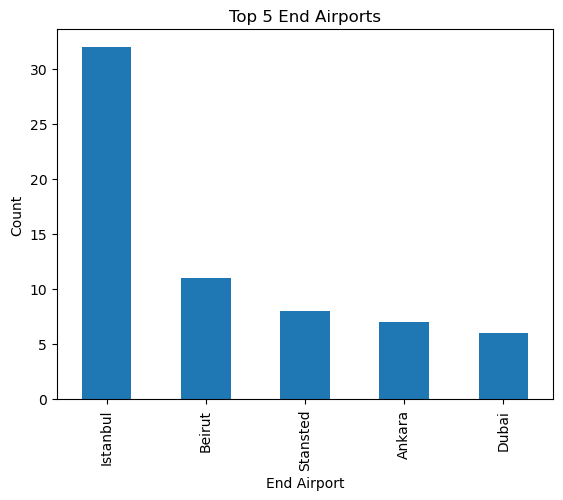

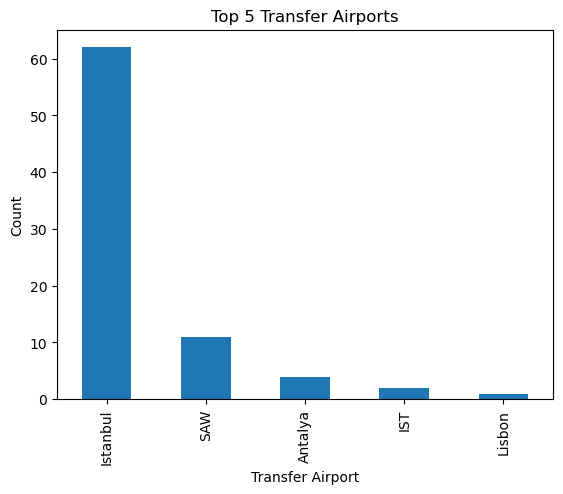

In [13]:
# Plot the top 5 start airports as a bar chart with labels
top_start_airports = df['start airport'].value_counts().head(5)
top_start_airports.plot(kind='bar')
plt.title("Top 5 Start Airports")
plt.xlabel("Start Airport")
plt.ylabel("Count")
plt.show()

# Plot the top 5 end airports as a bar chart with labels
top_end_airports = df['end airport'].value_counts().head(5)
top_end_airports.plot(kind='bar')
plt.title("Top 5 End Airports")
plt.xlabel("End Airport")
plt.ylabel("Count")
plt.show()

# Plot the top 5 transfer airports as a bar chart with labels
top_transfer_airports = df['transfer airport'].value_counts().head(5)
top_transfer_airports.plot(kind='bar')
plt.title("Top 5 Transfer Airports")
plt.xlabel("Transfer Airport")
plt.ylabel("Count")
plt.show()

#### Traveller Type

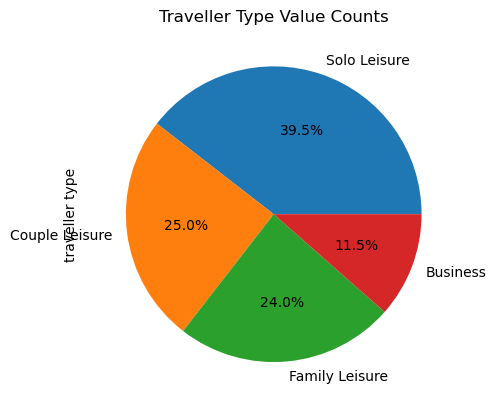

In [14]:
# Plot the traveller type value counts as a pie chart with labels
df['traveller type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Traveller Type Value Counts")
plt.show()

#### Seat Type

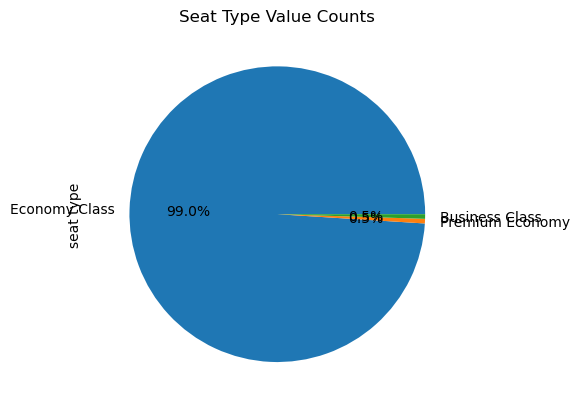

In [15]:
# Plot the seat type value counts as a pie chart with labels
df['seat type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Seat Type Value Counts")
plt.show()

#### Author's Nationality 

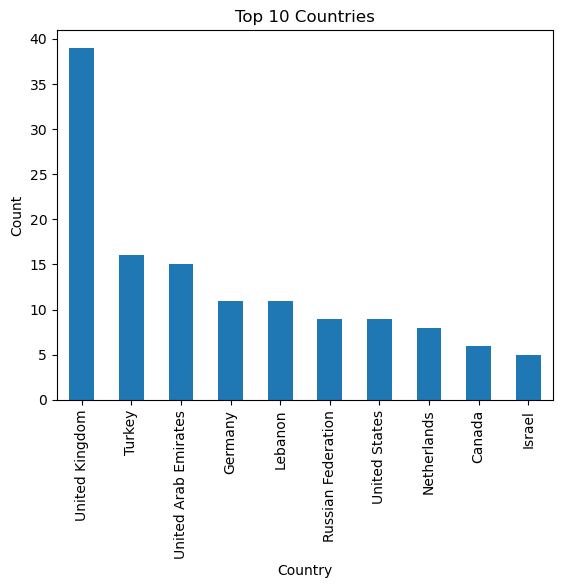

In [16]:
# Plot the top 5 countries as a bar chart with labels
top_countries = df.countries.value_counts().head(10)
top_countries.plot(kind='bar')
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

#### Type of Aircraft

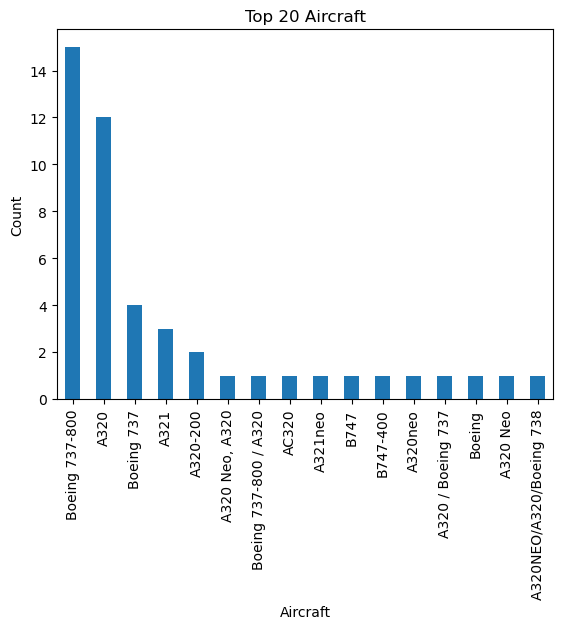

In [17]:
# Plot the top 5 aircraft as a bar chart with labels
top_aircraft = df.aircraft.value_counts().head(20)
top_aircraft.plot(kind='bar')
plt.title("Top 20 Aircraft")
plt.xlabel("Aircraft")
plt.ylabel("Count")
plt.show()

## Reviews Data Preprocessing

To harness the full potential of the scraped reviews corpus, it's crucial to perform data preprocessing. This prepares the data for subsequent tasks such as Topic Modeling and Sentiment Analysis. Here's a breakdown of the essential steps we'll undertake:

1. **Text Cleaning**: Beyond the initial preprocessing, we need to further refine the text. This includes removing special characters and converting all characters to lowercase for consistency.

2. **Stopwords Removal**: In English, stopwords are words that contribute little meaningful information. We'll eliminate them as part of text preprocessing. We can leverage the list of English stopwords provided by the NLTK library. Additionally, there are many words that don't add value to the review or may be common with the rest of reviews. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list. 

3. **Tokenization**: Tokenization involves dividing the text into smaller units called tokens. In this case, we use word tokenization, breaking the text into individual words for analysis.

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [19]:
# Preprocess the text data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stop_words.update(["pegasus","flight", "wizz","airway", "airline","plane", "told","also","passenger" \
                "heathrow", "aircraft", "could","even", "would"])

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

preprocessed_reviews = [preprocess_text(review) for review in df.reviews]

df_corpus = pd.DataFrame({'original reviews': df['reviews'], 'preprocessed reviews': preprocessed_reviews})
df_corpus.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joaquimbolosfernandez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joaquimbolosfernandez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,original reviews,preprocessed reviews
0,Worst experience ever. I have never written re...,worst experience ever never written reviews ai...
1,"They have delayed 1 hour, then another 30 minu...",delayed 1 hour another 30 minutes another 30 m...
2,The pram of my son arrived damaged after my fl...,pram son arrived damaged ankara manchester uk ...
3,"A delay in the return flight (2,5 hours) was a...",delay return hours absolutely poorly handled r...
4,Our flight was delayed 3 times. We got stuck i...,delayed 3 times got stuck airport hours notifi...


4. **POS Tagging**: While not mandatory for Topic Modeling, Parts of Speech (POS) tagging is a valuable process. It assigns each token a tag indicating its grammatical role, helping to preserve the context of words and facilitating lemmatization.



In [20]:
from nltk import pos_tag
from nltk.corpus import wordnet

#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/joaquimbolosfernandez/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/joaquimbolosfernandez/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joaquimbolosfernandez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df_corpus['pos tagged reviews'] = df_corpus['preprocessed reviews'].apply(token_stop_pos)
df_corpus.head()

,original reviews,preprocessed reviews,pos tagged reviews
0,Worst experience ever. I have never written re...,worst experience ever never written reviews ai...,"[(worst, a), (experience, n), (ever, r), (neve..."
1,"They have delayed 1 hour, then another 30 minu...",delayed 1 hour another 30 minutes another 30 m...,"[(delayed, v), (1, None), (hour, n), (another,..."
2,The pram of my son arrived damaged after my fl...,pram son arrived damaged ankara manchester uk ...,"[(pram, a), (son, n), (arrived, v), (damaged, ..."
3,"A delay in the return flight (2,5 hours) was a...",delay return hours absolutely poorly handled r...,"[(delay, n), (return, n), (hours, n), (absolut..."
4,Our flight was delayed 3 times. We got stuck i...,delayed 3 times got stuck airport hours notifi...,"[(delayed, v), (3, None), (times, n), (got, v)..."


5. **Lemmatization**: Lemmatization is a vital Natural Language Processing (NLP) technique. It reduces words to their base or dictionary forms (lemmas). The objective is to unify different inflected forms of words into a common base form, simplifying text analysis and information extraction.

Here are some key points to remember about lemmatization:

- **Lemmas**: Lemmas represent the base or dictionary form of words. For instance, lemmatizing "running" yields "run," and lemmatizing "better" results in "good."

- **Reducing Variants**: Lemmatization streamlines different inflected forms of a word into a common base form. For example, "jumps," "jumping," and "jumped" are all lemmatized to "jump."

- **Part of Speech (POS)**: Lemmatization often considers the part of speech of a word because the lemma can vary based on the word's grammatical role. For instance, "better" can be an adjective or an adverb, and the lemma depends on its role in the sentence.

- **Uses**: Lemmatization finds application in various NLP tasks, including text classification, sentiment analysis, information retrieval, and more. It simplifies text data by reducing dimensionality and enhancing the accuracy of text analysis.

By following these preprocessing steps, we prepare our reviews data for more advanced NLP tasks and derive valuable insights from the corpus.

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
# Obtaining the stem words – Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df_corpus['lemmatized reviews'] = df_corpus['pos tagged reviews'].apply(lemmatize)
df_corpus.head()

,original reviews,preprocessed reviews,pos tagged reviews,lemmatized reviews
0,Worst experience ever. I have never written re...,worst experience ever never written reviews ai...,"[(worst, a), (experience, n), (ever, r), (neve...",bad experience ever never write review airli...
1,"They have delayed 1 hour, then another 30 minu...",delayed 1 hour another 30 minutes another 30 m...,"[(delayed, v), (1, None), (hour, n), (another,...",delay 1 hour another 30 minute another 30 mi...
2,The pram of my son arrived damaged after my fl...,pram son arrived damaged ankara manchester uk ...,"[(pram, a), (son, n), (arrived, v), (damaged, ...",pram son arrive damage ankara manchester uk ...
3,"A delay in the return flight (2,5 hours) was a...",delay return hours absolutely poorly handled r...,"[(delay, n), (return, n), (hours, n), (absolut...",delay return hour absolutely poorly handle r...
4,Our flight was delayed 3 times. We got stuck i...,delayed 3 times got stuck airport hours notifi...,"[(delayed, v), (3, None), (times, n), (got, v)...",delay 3 time get stuck airport hour notifica...


## Topic Modelling

Topic modeling is a type of statistical modeling that uses unsupervised Machine Learning to identify clusters or groups of similar words within a body of text.

This text mining method uses semantic structures in text to understand unstructured data without predefined tags or training data. Topic modeling analyzes documents to identify common themes and provide an adequate cluster. For example, a topic modeling algorithm could identify whether incoming documents are contracts, invoices, complaints, or more based on their contents.

Latent semantic analysis and latent Dirichlet analysis are two main topic modeling methods that analyze large text files to categorize topics, provide valuable insights, and support better decision-making.

#### Latent Dirichlet Analysis

Latent Dirichlet analysis is one of the most popular topic modeling methods. It uncovers the hidden structure in a set of observations by looking at the relationships between words in a document and grouping them into topics.

It considers documents as a mixture of topics and topics as a mixture of words. When analyzing multiple documents, it treats them as having similar topics with different distributions.

For example, Document A may have "10% Topic Y" and "90% Topic Z", while Document B has "40% Topic Y" and "60% Topic Z".

The LDA model further breaks down topics into words, assuming that multiple topics may have common words. Consider the following three topics.

- Biology: This document may contain words like anatomy, dissection, and genomes
- Chemistry: This document may contain words such as solutions, chemicals, and alloys

Biology and chemistry may also share words like molecular weight and carbon cycle, which are considered similar “topics” in LDA. With LDA, you can analyze matching topics in these two documents and create specific groups for each topic. This way, you create a document term matrix, an interconnected network of topics, and analyze multiple documents to classify their contents, text, image, and more.



In [24]:
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# Create a document-term matrix using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf_lemma = tfidf_vectorizer.fit_transform(df_corpus['lemmatized reviews'])

# Perform LDA topic modeling
num_topics = 1
lda_lemma = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_lemma.fit(tfidf_lemma)

# Display the topics and associated words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

n_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print('LDA with lemmatized reviews')
print_top_words(lda_lemma, tfidf_feature_names, n_top_words)

LDA with lemmatized reviews
Topic #1:
istanbul time pay hour staff get seat delay ticket us



In [26]:
# Create a document-term matrix using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf_non_lemma = tfidf_vectorizer.fit_transform(df_corpus['preprocessed reviews'])

# Perform LDA topic modeling
num_topics = 1
lda_non_lemma = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_non_lemma.fit(tfidf_non_lemma)

# Display the topics and associated words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

n_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print('LDA with non lemmatized reviews')
print_top_words(lda_non_lemma, tfidf_feature_names, n_top_words)


LDA with non lemmatized reviews
Topic #1:
istanbul staff us time airlines airport hours service luggage pay



In [27]:
# Create a topic modelling for all the bad reviews, so we can actually see the most frequent topics for those

# First add the reviews columns into the df_corpus to be able to filter them
df_corpus['recommended'] = df['recommended']
df_corpus_neg_reviews = df_corpus[df_corpus['recommended'] == 'no']

# Create a document-term matrix using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf_lemma_neg_reviews = tfidf_vectorizer.fit_transform(df_corpus_neg_reviews['lemmatized reviews'])

# Perform LDA topic modeling
num_topics = 1
lda_lemma_neg_reviews = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_lemma_neg_reviews.fit(tfidf_lemma_neg_reviews)

# Display the topics and associated words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

n_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print('LDA with non lemmatized reviews')
print_top_words(lda_lemma_neg_reviews, tfidf_feature_names, n_top_words)


LDA with non lemmatized reviews
Topic #1:
istanbul pay hour time us staff get ticket delay airport



## Sentiment Analysis

Sentiment analysis, also referred to as opinion mining, is a vital natural language processing (NLP) technique employed to unveil the underlying sentiment or emotional tone embedded within a piece of text.

Its primary role is to dissect and classify text into categories such as positive, negative, or neutral. However, it extends far beyond binary sentiments and can discern nuanced emotions like joy, anger, sadness, and more. This versatility makes sentiment analysis a powerful tool with applications spanning across product reviews, social media content, customer feedback, and various other domains.

While the Python NLP library TextBlob, or NLTK are common choices for sentiment analysis, there are specialized tools like VADER (Valence Aware Dictionary and sEntiment Reasoner) tailored specifically for this purpose. VADER excels in the analysis of online reviews, providing fine-grained sentiment scores. Moreover, it adeptly handles the intricate nuances of emoticons and slang often prevalent in social media and online review platforms.

In this context, we'll utilize VADER to delve into sentiment analysis, harnessing its capabilities to gain deeper insights into the emotions expressed in the reviews.

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df_corpus['sentiment scores'] = df_corpus['lemmatized reviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df_corpus['sentiment reviews'] = df_corpus['sentiment scores'].apply(vader_analysis)
df_corpus.head()

,original reviews,preprocessed reviews,pos tagged reviews,lemmatized reviews,recommended,sentiment scores,sentiment reviews
0,Worst experience ever. I have never written re...,worst experience ever never written reviews ai...,"[(worst, a), (experience, n), (ever, r), (neve...",bad experience ever never write review airli...,no,-0.9343,Negative
1,"They have delayed 1 hour, then another 30 minu...",delayed 1 hour another 30 minutes another 30 m...,"[(delayed, v), (1, None), (hour, n), (another,...",delay 1 hour another 30 minute another 30 mi...,no,-0.8074,Negative
2,The pram of my son arrived damaged after my fl...,pram son arrived damaged ankara manchester uk ...,"[(pram, a), (son, n), (arrived, v), (damaged, ...",pram son arrive damage ankara manchester uk ...,no,-0.8953,Negative
3,"A delay in the return flight (2,5 hours) was a...",delay return hours absolutely poorly handled r...,"[(delay, n), (return, n), (hours, n), (absolut...",delay return hour absolutely poorly handle r...,no,-0.8442,Negative
4,Our flight was delayed 3 times. We got stuck i...,delayed 3 times got stuck airport hours notifi...,"[(delayed, v), (3, None), (times, n), (got, v)...",delay 3 time get stuck airport hour notifica...,no,-0.6705,Negative


In [29]:
# Obtain the value counts of the sentiment reviews
vader_counts = df_corpus['sentiment reviews'].value_counts()
print(vader_counts)

Negative    127
Positive     53
Neutral      20
Name: sentiment reviews, dtype: int64


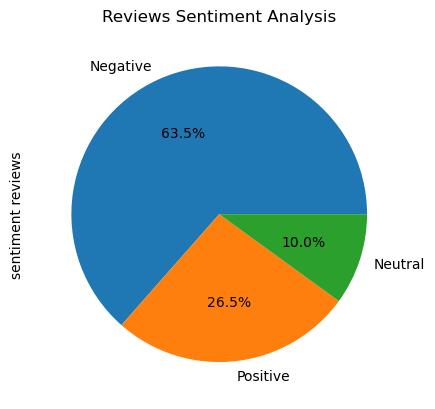

In [30]:
# Plot the traveller type value counts as a pie chart with labels
df_corpus['sentiment reviews'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Reviews Sentiment Analysis")
plt.show()

## WordClouds

WordClouds are a visual representation of text data in which the most frequently occurring words are displayed with greater prominence. In a word cloud, words are typically arranged in a visually appealing way, and the size of each word is determined by its frequency in the source text.

In [31]:
from wordcloud import WordCloud

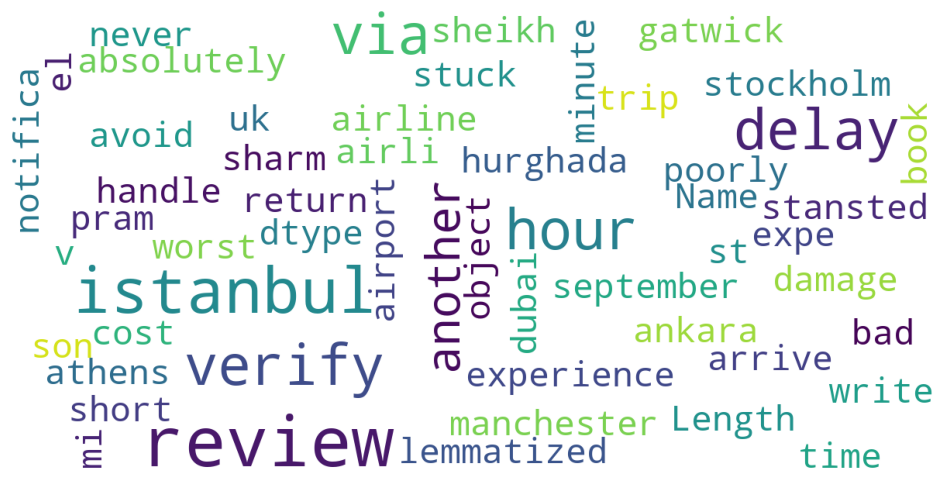

In [32]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_corpus['lemmatized reviews'])


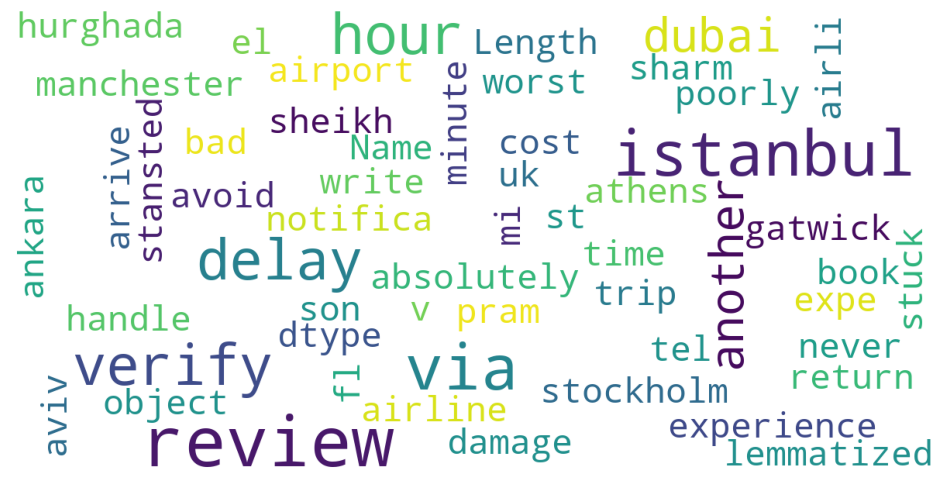

In [33]:
# WordCloud with only negative reviews
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_corpus_neg_reviews['lemmatized reviews'])

## Key Metrics to present

1. Overall ratings

In [34]:
df.rating.mean()

2.7

2. Reviews from X countries - 54 countries

In [35]:
len(df.countries.value_counts())

52

3. Number of reviews collected - 3000 - Only 1710 Verified

In [36]:
len(df.reviews)

200

4. Pie plots of Sentiment Analysis and Recommended Values of Reviews

In [37]:
# Tableau

5. Top 10 Routes with their average ratings and sentiment analysis ratings

In [38]:
# First add the sentiment analysis into the main dataframe df
df['sentiment analysis'] = df_corpus['sentiment reviews']
df['sentiment analysis scores'] = df_corpus['sentiment scores']

# Then convert all the London airports into one same airport London, to determine the most frequent routes
replacement_dict = {'London Heathrow': 'London', 'London Gatwick': 'London', 'Gatwick': 'London','Heathrow': 'London'}
df['start airport'].replace(replacement_dict, inplace=True)
df['end airport'].replace(replacement_dict, inplace=True)
df['transfer airport'].replace(replacement_dict, inplace=True)

# Create a new dataframe that includes route info, ratings and sentiment analysis ratings
flight_data = pd.DataFrame({'StartAirport': df['start airport'], 'EndAirport': df['end airport'],'TransferAirport': df['transfer airport'],'Rating': df['rating'],'SentimentScore': df['sentiment analysis scores'], 'Review': df['sentiment analysis']})

flight_data['StartAirport'].astype(str)
flight_data['EndAirport'].astype(str)
flight_data['TransferAirport'].astype(str)
flight_data.reset_index(inplace=True)

# Create a new column 'Route' that combines start and end airports to represent the route 
route = []
for i in range(len(flight_data)):
    if pd.isna(flight_data['TransferAirport'][i]):
        route.append(f"{flight_data['StartAirport'][i]} -> {flight_data['EndAirport'][i]}")
    else:
        transfer = flight_data['TransferAirport'][i] if not pd.isna(flight_data['TransferAirport'][i]) else ""
        route.append(f"{flight_data['StartAirport'][i]} -> {flight_data['EndAirport'][i]} -> {transfer}")

flight_data['Route'] = route

# Group the DataFrame by the 'Route' column and count the occurrences
route_counts = flight_data['Route'].value_counts().reset_index()
route_counts.columns = ['Route', 'RouteCount']

# Find the top 10 most frequent routes
top_10_routes = route_counts.nlargest(10, 'RouteCount')

# Merge the most frequent routes back into the original DataFrame
flight_data = flight_data.merge(top_10_routes, on='Route')

# Calculate the mean rating, mean sentiment score, and dominant sentiment for the most frequent routes
route_summary = flight_data.groupby('Route').agg({
    'Rating': 'mean',
    'SentimentScore': 'mean',
    'Review': lambda x: x.value_counts().idxmax()
}).reset_index()

# Rename the columns for clarity
route_summary.rename(columns={
    'Rating': 'MeanRating',
    'SentimentScore': 'MeanSentimentScore',
    'Review': 'DominantSentiment'
}, inplace=True)

# Merge the route counts back into the route summary
route_summary = route_summary.merge(top_10_routes, on='Route')

# Order the results by the route count in descending order
route_summary = route_summary.sort_values(by='RouteCount', ascending=False)

# Print the most frequent routes with additional information
route_summary.head(10)


,Route,MeanRating,MeanSentimentScore,DominantSentiment,RouteCount
1,Amsterdam -> Istanbul,1.500000,-0.279175,Negative,4
3,Beirut -> Istanbul,2.333333,-0.380200,Negative,3
4,Dubai -> Istanbul,4.000000,0.193300,Positive,3
5,Istanbul -> Beirut,1.000000,-0.652200,Negative,3
6,Istanbul -> Dubai,2.333333,-0.130933,Negative,3
7,Istanbul -> London,1.666667,0.115467,Positive,3
8,Istanbul -> Stansted,1.000000,-0.403200,Negative,3
9,London -> Istanbul,1.000000,-0.620533,Negative,3
0,Amsterdam -> Beirut -> Istanbul,1.500000,-0.668550,Negative,2
2,Antalya -> Istanbul,1.000000,-0.652050,Negative,2


6. Average ratings of seat comfort / cabin service / food & beverages / inflight entertainment / ground service / wifi

In [39]:
df_ratings = df[['seat comfort', 'cabin staff service', 'food & beverages', 'inflight entertainment', 'ground service', 'wifi']]

# Calculate the mean of each column
means = df_ratings.mean()

# Print the mean values for each column
print(means)

seat comfort              1.944751
cabin staff service       2.222222
food & beverages          1.876190
inflight entertainment    1.125000
ground service            1.891192
wifi                      1.086207
dtype: float64


7. Traveller type pie Plot with client satisfaction percentages

In [40]:
# Tableau

8. Seat type value counts with client satisfaction

In [41]:
# Tableau

9. WordClouds

In [42]:
# Tableau

10. Topic Modelling

In [43]:
# Tableau

## Export DataFrame with Sentiment Analysis and Lemmatized Reviews to CSV 

In [44]:
# Export the dataset with 
cwd = os.getcwd()
df.to_csv(f"{cwd}/data/pegasus_airlines_reviews_sentiment_analysis.csv")


In [45]:
# Export the dataset with lemmatized reviews
df['lemmatized reviews'] = df_corpus['lemmatized reviews']
df.to_csv(f"{cwd}/data/pegasus_airlines_reviews_sentiment_analysis_lemmatized.csv")
df.head()


,authors,countries,date,rating,reviews,aircraft,traveller type,seat type,route,date flown,...,wifi,value for money,recommended,verified,start airport,end airport,transfer airport,sentiment analysis,sentiment analysis scores,lemmatized reviews
0,Nikolai Sondergaard,Denmark,2023-11-10,1,Worst experience ever. I have never written re...,NaN,Solo Leisure,Economy Class,Istanbul to Bruxelles,August 2023,...,1.0,2,no,True,Istanbul,Bruxelles,NaN,Negative,-0.9343,bad experience ever never write review airli...
1,Kenan Arslan,United Arab Emirates,2023-11-10,1,"They have delayed 1 hour, then another 30 minu...",NaN,Solo Leisure,Economy Class,Adana to Sabiha Gokcen,November 2023,...,1.0,1,no,True,Adana,Sabiha Gokcen,NaN,Negative,-0.8074,delay 1 hour another 30 minute another 30 mi...
2,S Senturk,United Kingdom,2023-11-10,1,The pram of my son arrived damaged after my fl...,NaN,Family Leisure,Economy Class,Ankara to Manchester via Istanbul,October 2023,...,1.0,1,no,True,Ankara,Manchester,Istanbul,Negative,-0.8953,pram son arrive damage ankara manchester uk ...
3,Luc Wens,Belgium,2023-10-28,1,"A delay in the return flight (2,5 hours) was a...",Boeing 737-800,Business,Economy Class,Istanbul to Brussels Charleroi,October 2023,...,NaN,1,no,True,Istanbul,Brussels Charleroi,NaN,Negative,-0.8442,delay return hour absolutely poorly handle r...
4,Manar Ali Hassan,Lebanon,2023-10-23,1,Our flight was delayed 3 times. We got stuck i...,NaN,Couple Leisure,Economy Class,Istanbul to Beirut,October 2023,...,NaN,1,no,False,Istanbul,Beirut,NaN,Negative,-0.6705,delay 3 time get stuck airport hour notifica...


In [46]:
# Export the route summary dataframe 
route_summary.to_csv(f"{cwd}/data/pegasus_airlines_reviews_routesummary.csv")
route_summary.head()

,Route,MeanRating,MeanSentimentScore,DominantSentiment,RouteCount
1,Amsterdam -> Istanbul,1.500000,-0.279175,Negative,4
3,Beirut -> Istanbul,2.333333,-0.380200,Negative,3
4,Dubai -> Istanbul,4.000000,0.193300,Positive,3
5,Istanbul -> Beirut,1.000000,-0.652200,Negative,3
6,Istanbul -> Dubai,2.333333,-0.130933,Negative,3
